In [53]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv("./cluster-mpg.csv")

In [55]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


gives general ranges

very important: when to or when need not to cale
if anytime distance metric is being used must scale
here see that 

NOTE: a unique column is not necessary for the unsupervised cuz in no way helping cluster?

In [56]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [57]:
df=df.drop('name',axis=1)

In [58]:
df_w_dummies=pd.get_dummies(df)

In [59]:
from sklearn.preprocessing import MinMaxScaler#cuz easier to undertsnad what the distacnes are


In [60]:
#minmaxcaler
#sqrt((x1_1-x1_b)^2)
#max one
scaler=MinMaxScaler()

In [61]:
scaled_data=scaler.fit_transform(df_w_dummies)

In [62]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [63]:
scaled_df=pd.DataFrame(scaled_data,columns=df_w_dummies.columns)

<Axes: >

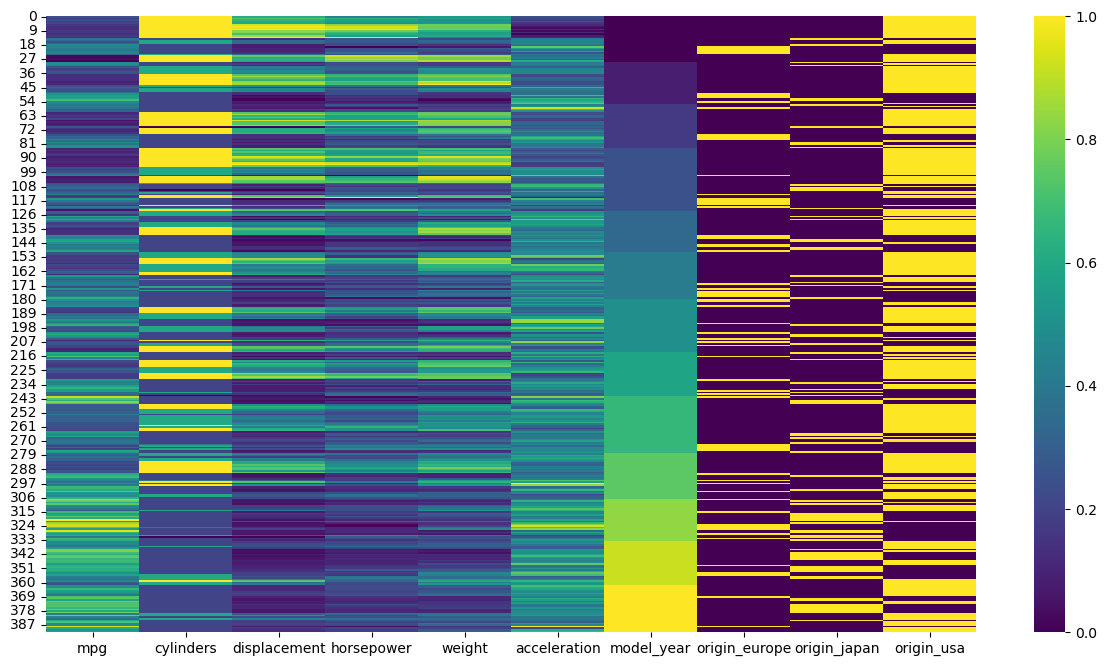

In [64]:
plt.figure(figsize=(15,8))
sns.heatmap(scaled_df,cmap='viridis')

In [65]:
len(df)#number of colours

392

model year is a nice gradient

origin values to the right are binary colours cuz either 0 or 1

cluster map would crash the laptop

<Figure size 1500x800 with 0 Axes>

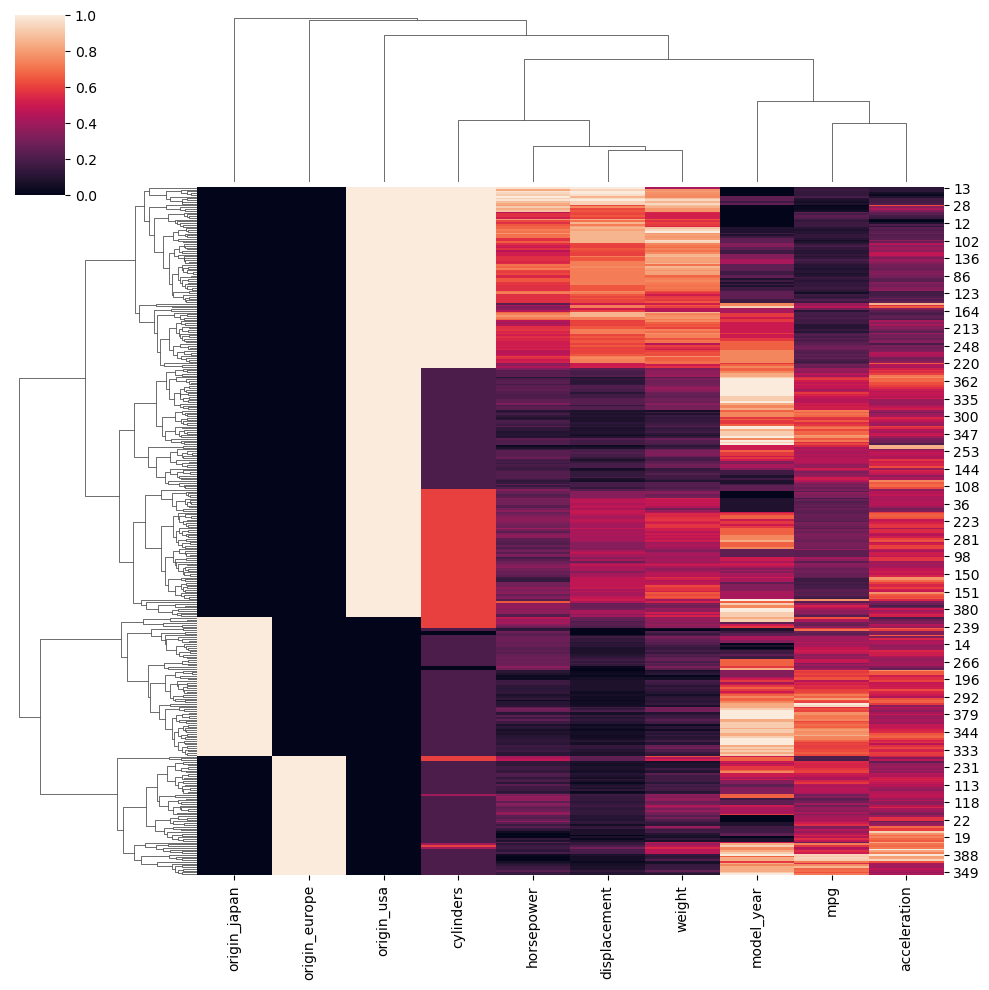

In [66]:
plt.figure(figsize=(15,8))
sns.clustermap(scaled_df)

by default clustering along x and y
maybe trying to cluster similar cars together here like clustering based off the rows 

<Figure size 1500x800 with 0 Axes>

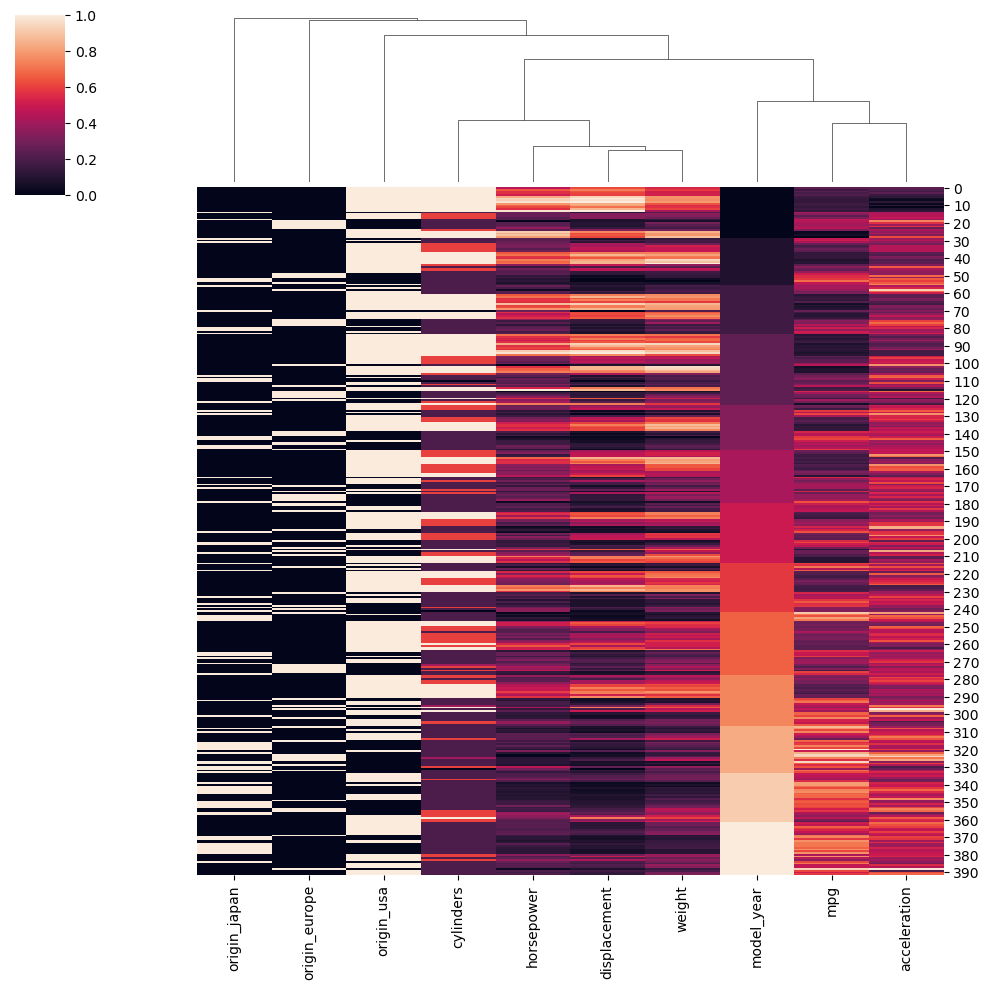

In [67]:
plt.figure(figsize=(15,8))
sns.clustermap(scaled_df,row_cluster=False)

clusters togeter on base of dendrograms
note that dummy variables gte clustered last cuz thy are the most dissimilar
very good method of finding which features similar to each other

<Axes: >

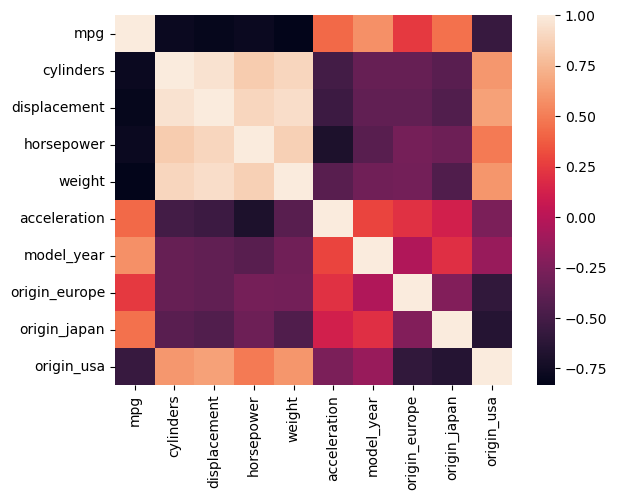

In [68]:
sns.heatmap(scaled_df.corr())

but whatwe really want is only based on row clusters

but all of this doesnt work for large data sets cuz visulaization becomes diff adn doesnt veen give back cluster labels

<Figure size 1500x800 with 0 Axes>

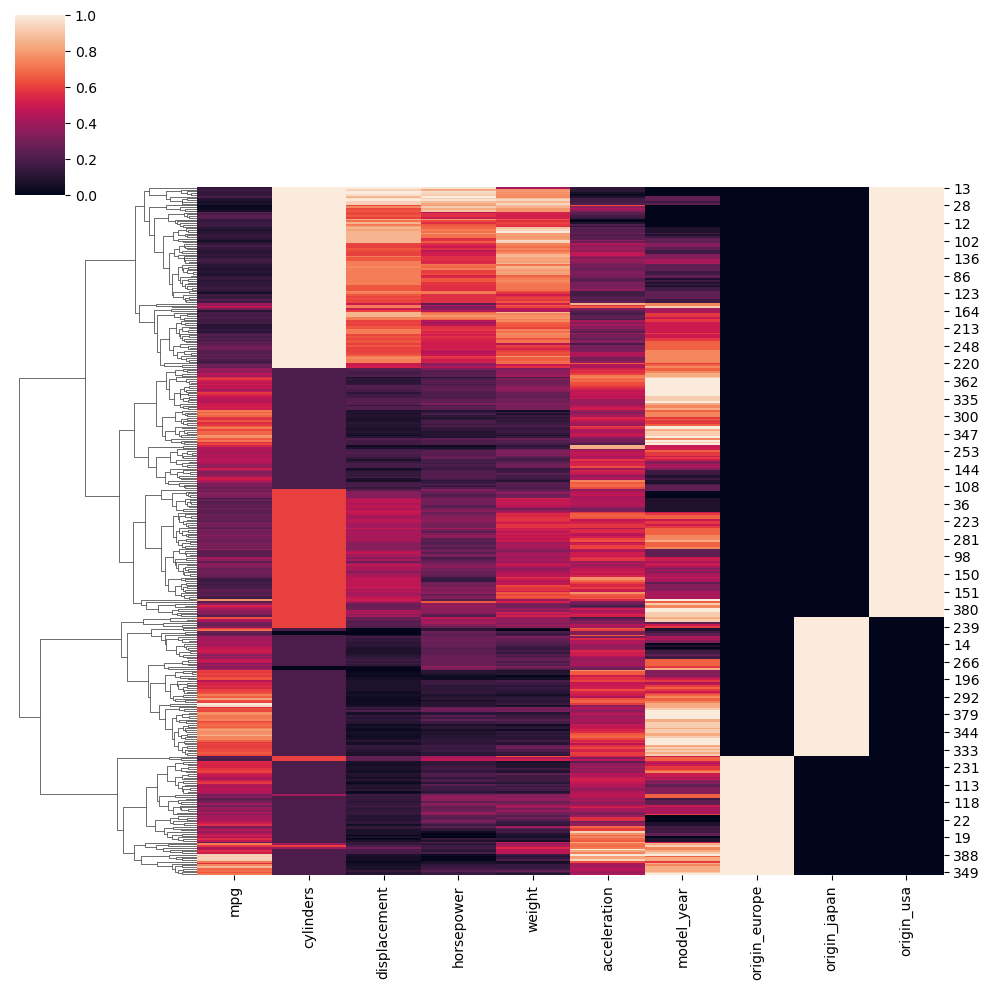

In [69]:
plt.figure(figsize=(15,8))
sns.clustermap(scaled_df,col_cluster=False)

eveyrhting has been reordered
can see has been done on base of clountries
first split on origin
second split on base of cylinder and its very clear clear cuz 2,4,6,8
but usually will have hues which need to be checkded very carefully
like displacement can see a light band then dark band and so on
way to check if too big or too small is based on whether takes forever or not

how to choose clusters beforehand and seocnd to take help from scikit learn to decide clustering 
and take labels themselves

agglomeraive clustering can use kmean apporach or can use distance threshold where let it guide how many clusters to choose

In [70]:
from sklearn.cluster import AgglomerativeClustering

In [71]:
model=AgglomerativeClustering(n_clusters=4)

In [72]:
cluster_labels=model.fit_predict(scaled_df)

NO TRAIN AND TEST SPLIT CUZ THERE IS NO SORT OF RIGHT LABELTO THEM

In [73]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

CAN VISULAIZSE ON FATURES OR THEIR GROUPS

<Axes: xlabel='mpg', ylabel='weight'>

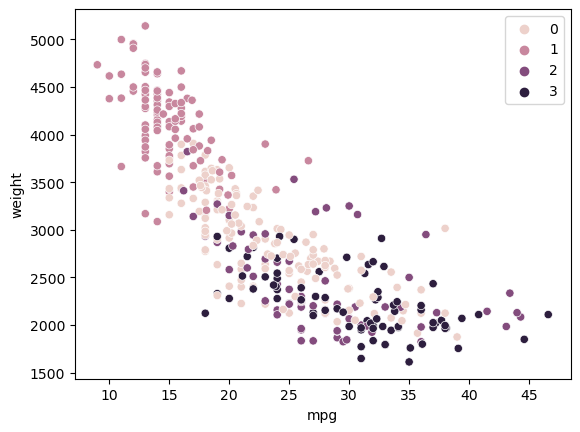

In [74]:
sns.scatterplot(data=df,x='mpg',y='weight',hue=cluster_labels)

do make this more comprehendable

<Axes: xlabel='mpg', ylabel='weight'>

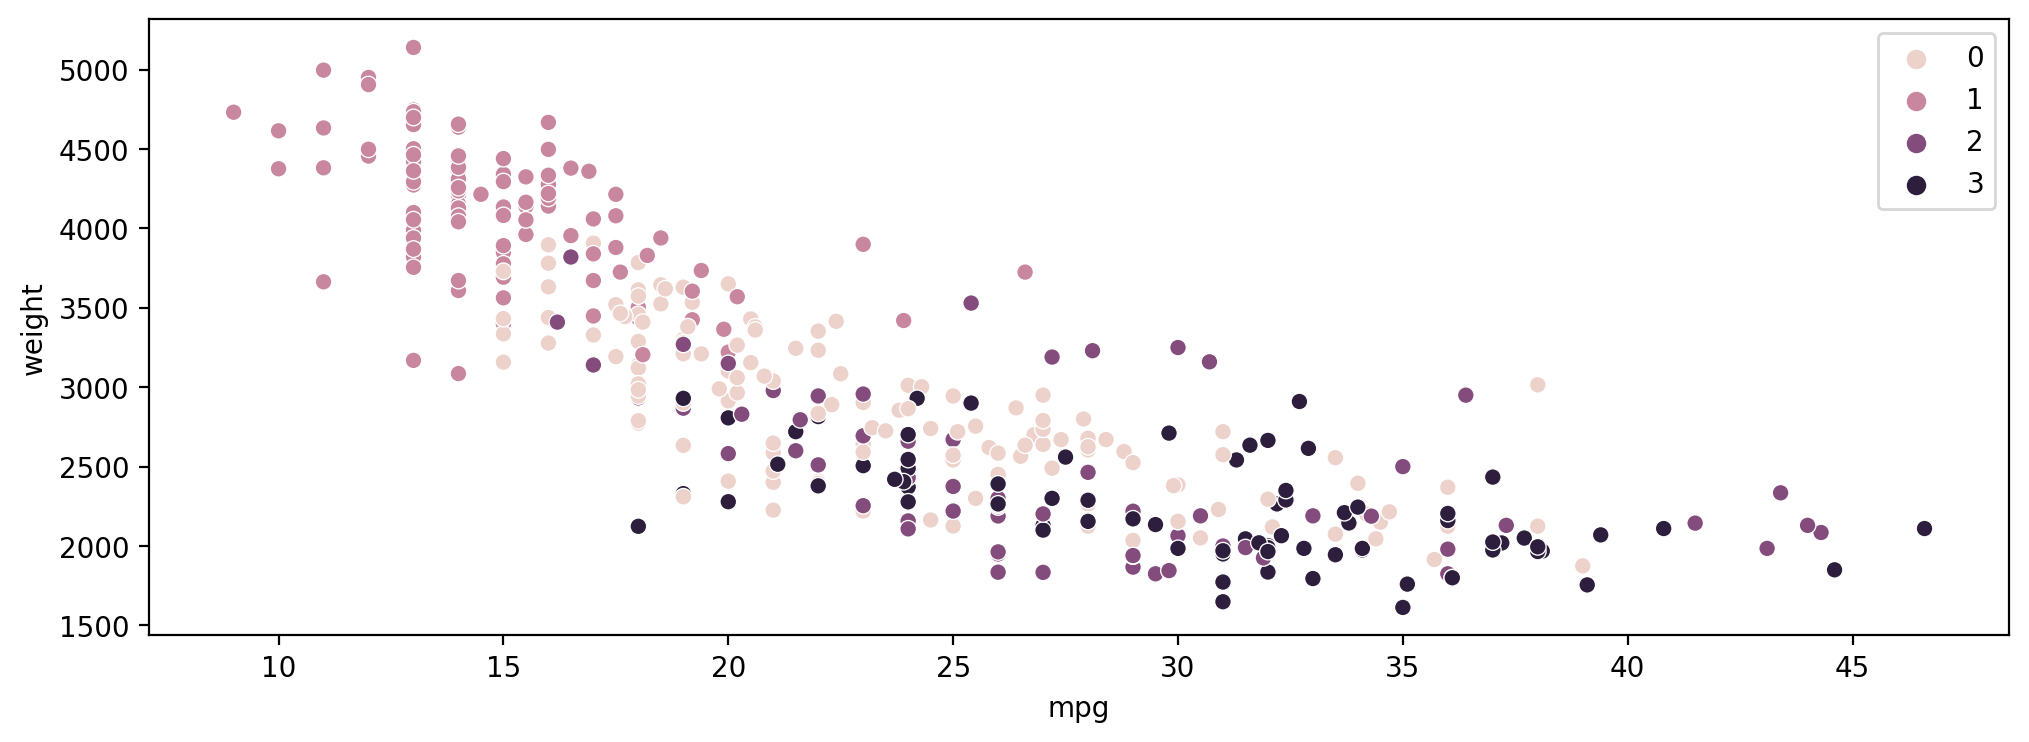

In [75]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='mpg',y='weight',hue=cluster_labels)

see how heavier cars have lesser miles per gallon and vice versa

<Axes: xlabel='mpg', ylabel='horsepower'>

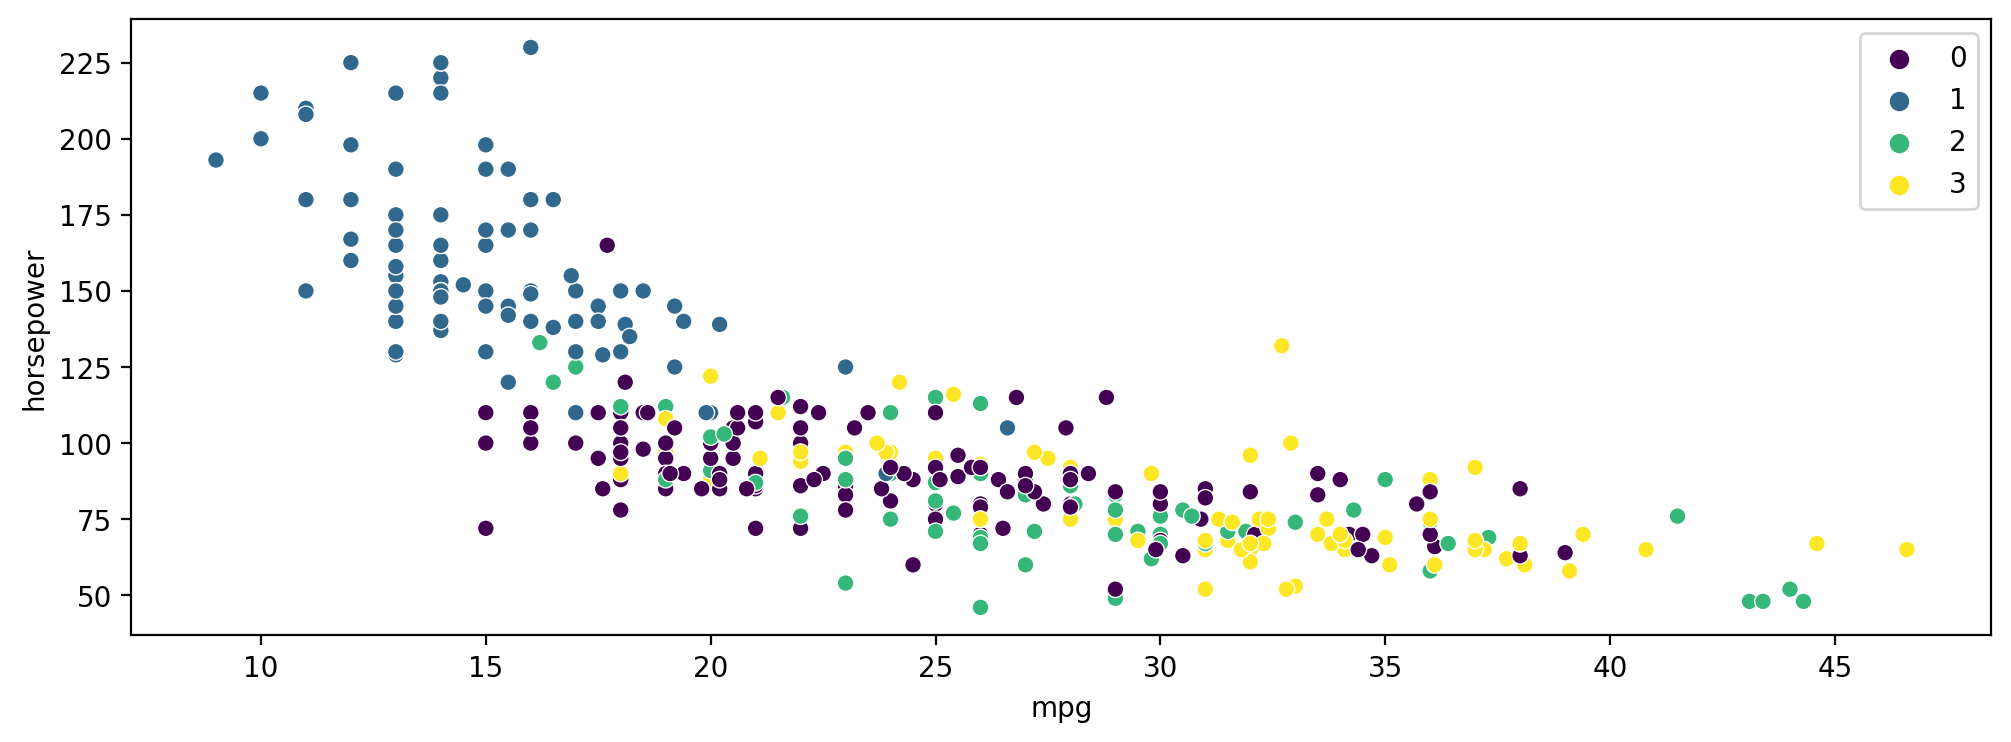

In [76]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='mpg',y='horsepower',hue=cluster_labels,palette='viridis')

here when lesser miles per gallon and more horespower very clear
but after that very different that when would need want to include more features or clusters
this was till putting own number of clusters
now will use linkage=euclidean cuz specially comfy with min max scaler and always between and 1 

In [77]:
#max distance possible== sqrt(n_features)
len(scaled_df.columns)

10

In [78]:
np.sqrt(10)#this is the max distance you can have between two points

3.1622776601683795

there is a distacne threshold clusters beond which wont be merged

In [79]:
model=AgglomerativeClustering(n_clusters=None,distance_threshold=2)#een if there are two points with 0 distacne between them still will not cluster them

In [80]:
cluster_labels=model.fit_predict(scaled_df)#makes every point a cluster

In [81]:
cluster_labels

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9

In [82]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [83]:
linkage_matrix=hierarchy.linkage(model.children_)

In [84]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

the linkage matrix represent the index 0/column 0 and icolumn 1 combines these two clusters
to make a new cluster the third point is the distance between these two clusters
then also have the actual number of points in the cluster
will have more and more number of lcuster points eventuallymathematical info to plot the dendorgram
making of dendogram takes a lot of time 

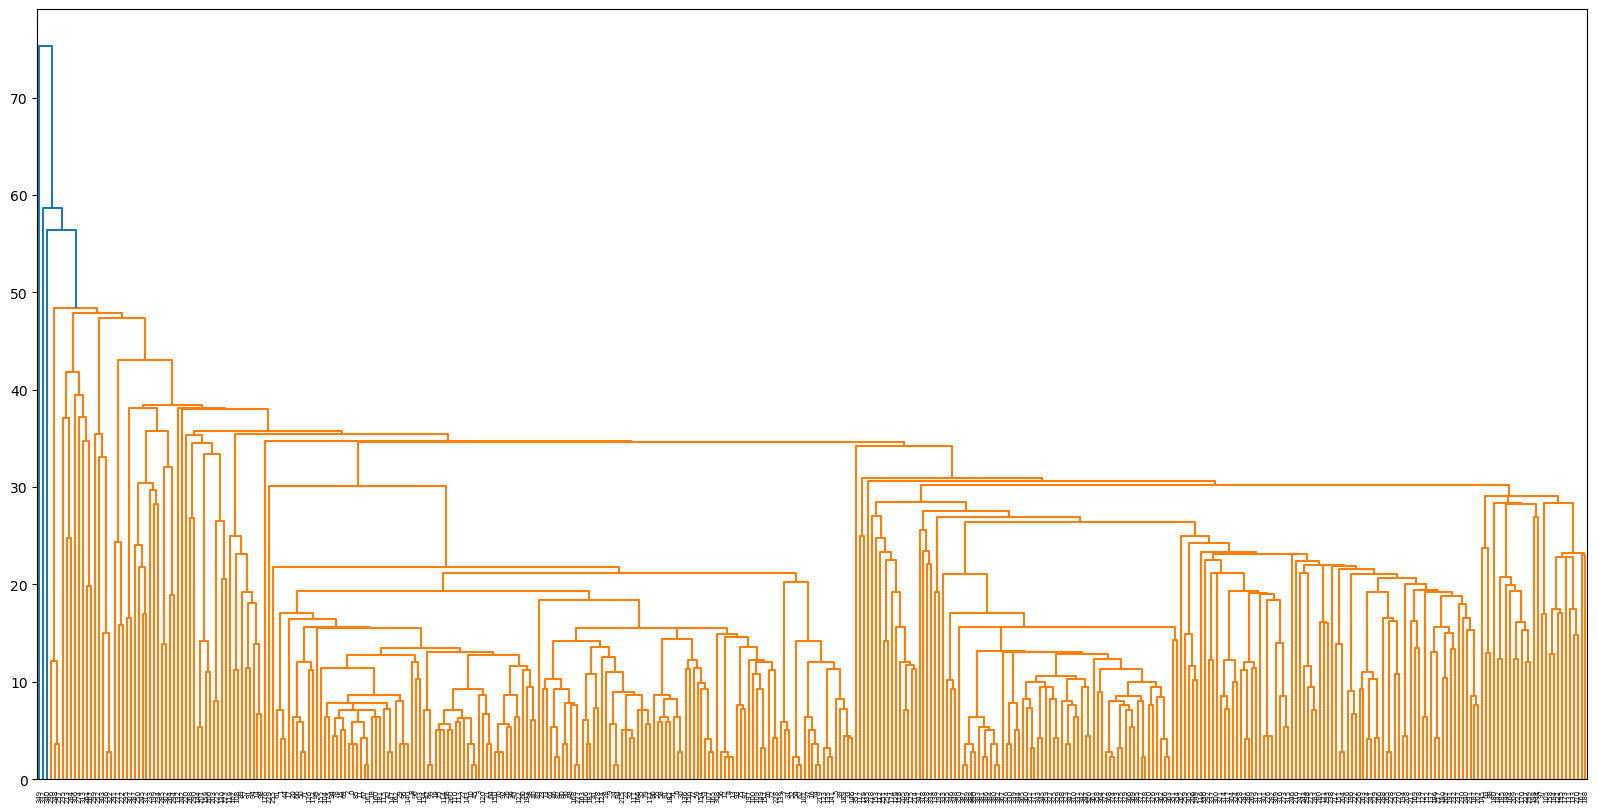

In [85]:
plt.figure(figsize=(20,10))
dendro=dendrogram(linkage_matrix)

here 67 and 161 would be connected and the height would be distance between them 1.141
would always start at 2 and end at n-1
not super useful but can make judgement calls of where to cut of heirarchy and do truncation mode
truncate_mode lastp cuts f dendrogram and level

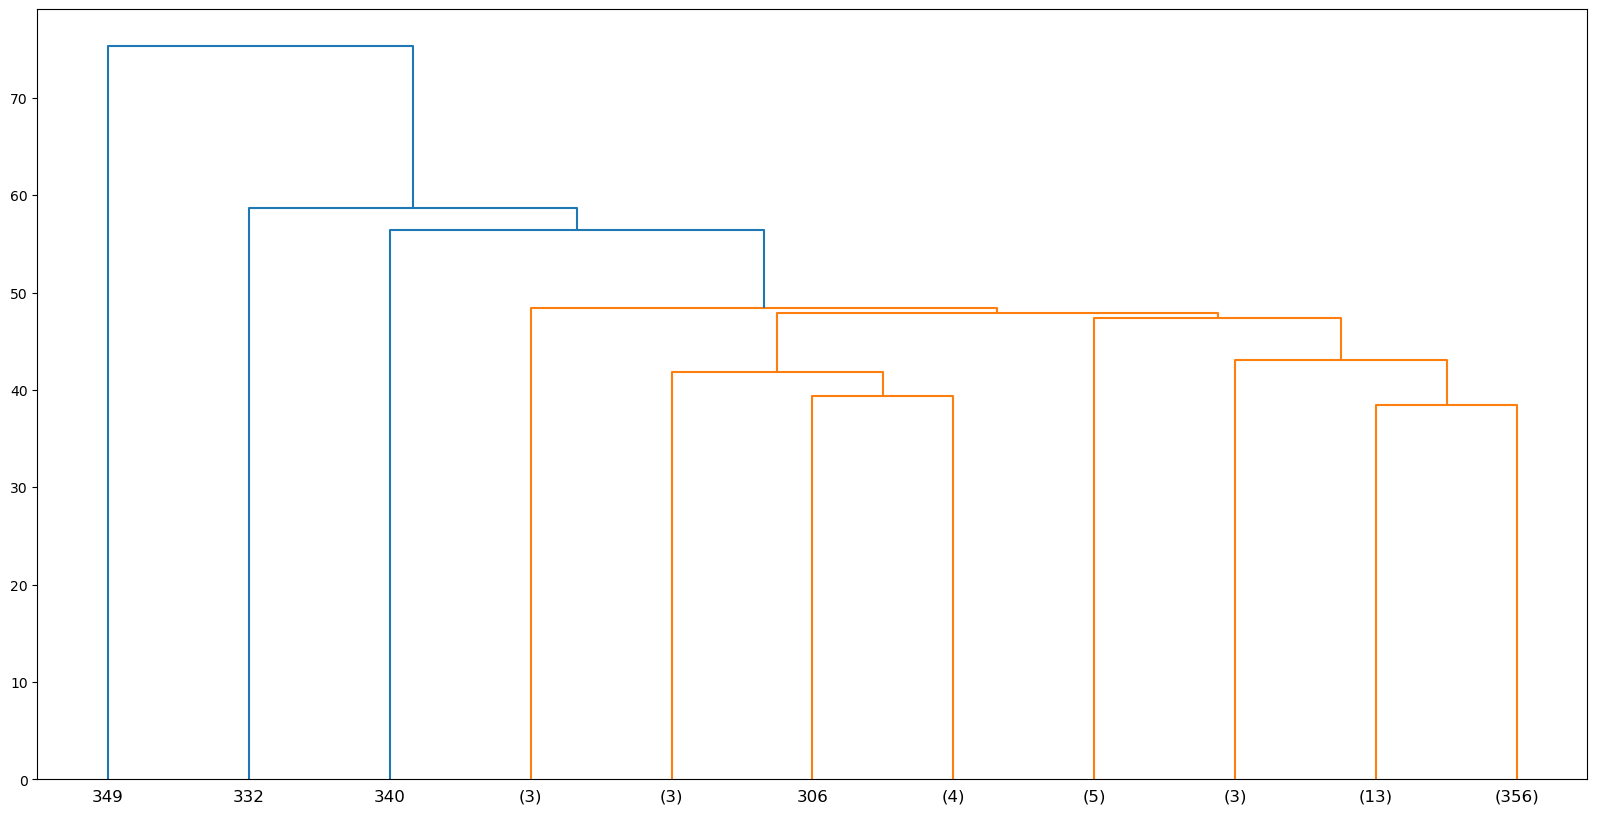

In [95]:
plt.figure(figsize=(20,10))
dendro=dendrogram(linkage_matrix,truncate_mode='lastp',p=11)

now just referring to cluster number
just helps in choosing number of cluster

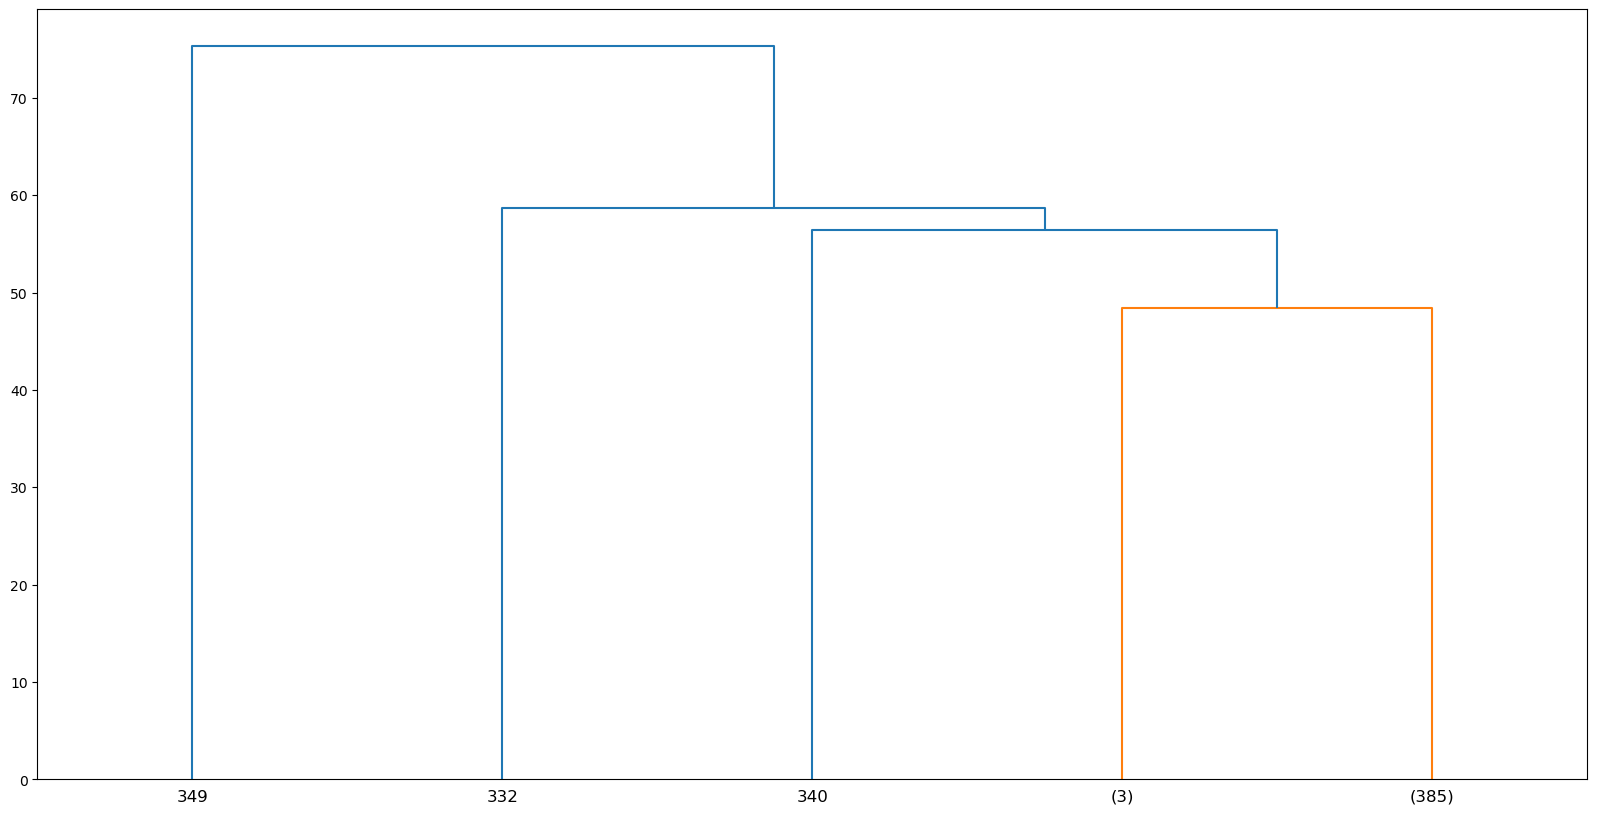

In [87]:
plt.figure(figsize=(20,10))
dendro=dendrogram(linkage_matrix,truncate_mode='level',p=3)

colour is another tool like threshold helps
but visualising not best way for big dataset
instead will try and use euclidean distacne

In [88]:
scaled_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.384200,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299,0.173469,0.201531,0.625000
std,0.207580,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978,0.379136,0.401656,0.484742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.212766,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000,0.000000,0.000000,0.000000
50%,0.365691,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000,0.000000,0.000000,1.000000
75%,0.531915,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
np.sqrt(len(scaled_df.columns))

3.1622776601683795

In [90]:
scaled_df['mpg'].idxmax()

320

In [91]:
scaled_df['mpg'].idxmin()

28

In [92]:
car_a=scaled_df.iloc[320]
car_b=scaled_df.iloc[28]

In [93]:
distance=np.linalg.norm(car_a-car_b)#keep in mind max dist btw clusters
#diff from min max dist between two points

In [94]:
distance#max dist btw two points and starts giving idea on distance thres values

2.3852929970374714

made around 11 clusters after set the distance threshold =2
very exploratory
what values shoould be put in the model